# Practical 4 : Edge Detection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import itertools
from scipy.ndimage.interpolation import shift

path_base =  '/content/drive/MyDrive/Colab Notebooks/M1_DSAI_IAwAtSI_PW1/Base_images'

<ipython-input-3-37afecc78a31>:5: DeprecationWarning: Please import `shift` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.interpolation import shift


# 1. one-dimensional case
The aim of this section is to show you the starting point for one-way filtering in imaging, which is none other than the filtering of 1D signals. This section will also enable you to understand the contour detection operation in 1D, so that you can generalize it to the 2D case (images).

Create two one-dimensional functions representing an “amplitude jump” contour and a “roof” contour.


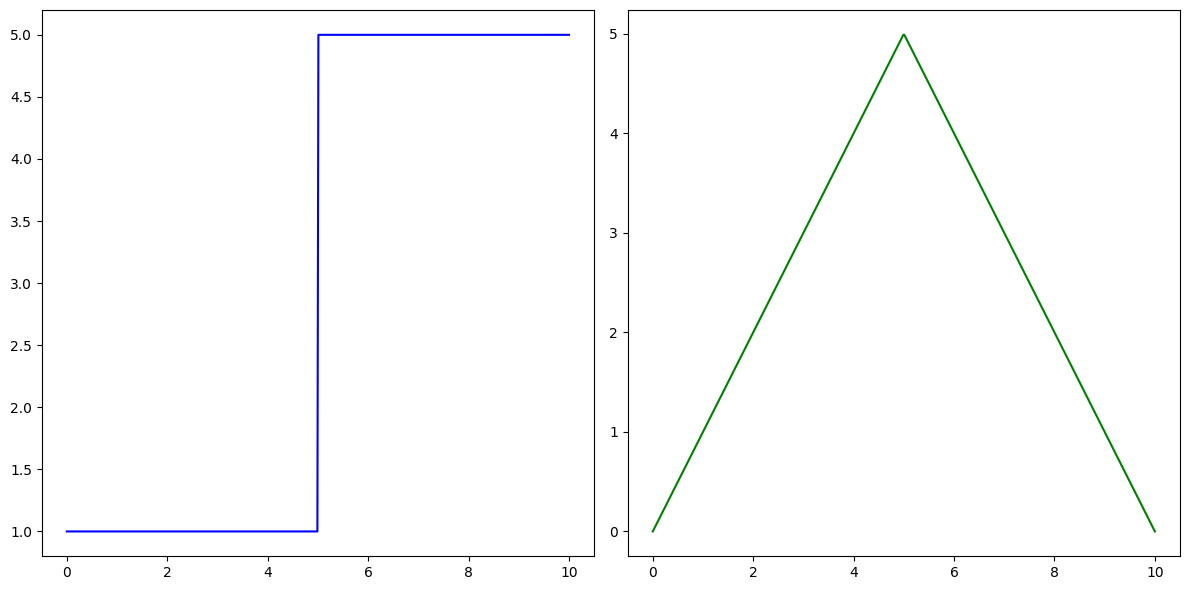

In [5]:
# To be completed
# Creation of the “amplitude jump” function
x = np.linspace(0, 10, 500)
amplitude_jump = np.where(x < 5, 1, 5)

# Creation of the “roof” function
roof = np.where(x < 5, x, 10 - x)


# Display both functions (curves)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, amplitude_jump, label="Amplitude Jump", color="blue")

plt.subplot(1, 2, 2)
plt.plot(x, roof, label="Roof", color="green")

plt.tight_layout()
plt.show()

For each of these functions, you'll calculate the first and second derivatives, using Python's diff function to calculate the derivative. What exactly does this function do, and how does it relate to the definition of the derivative?

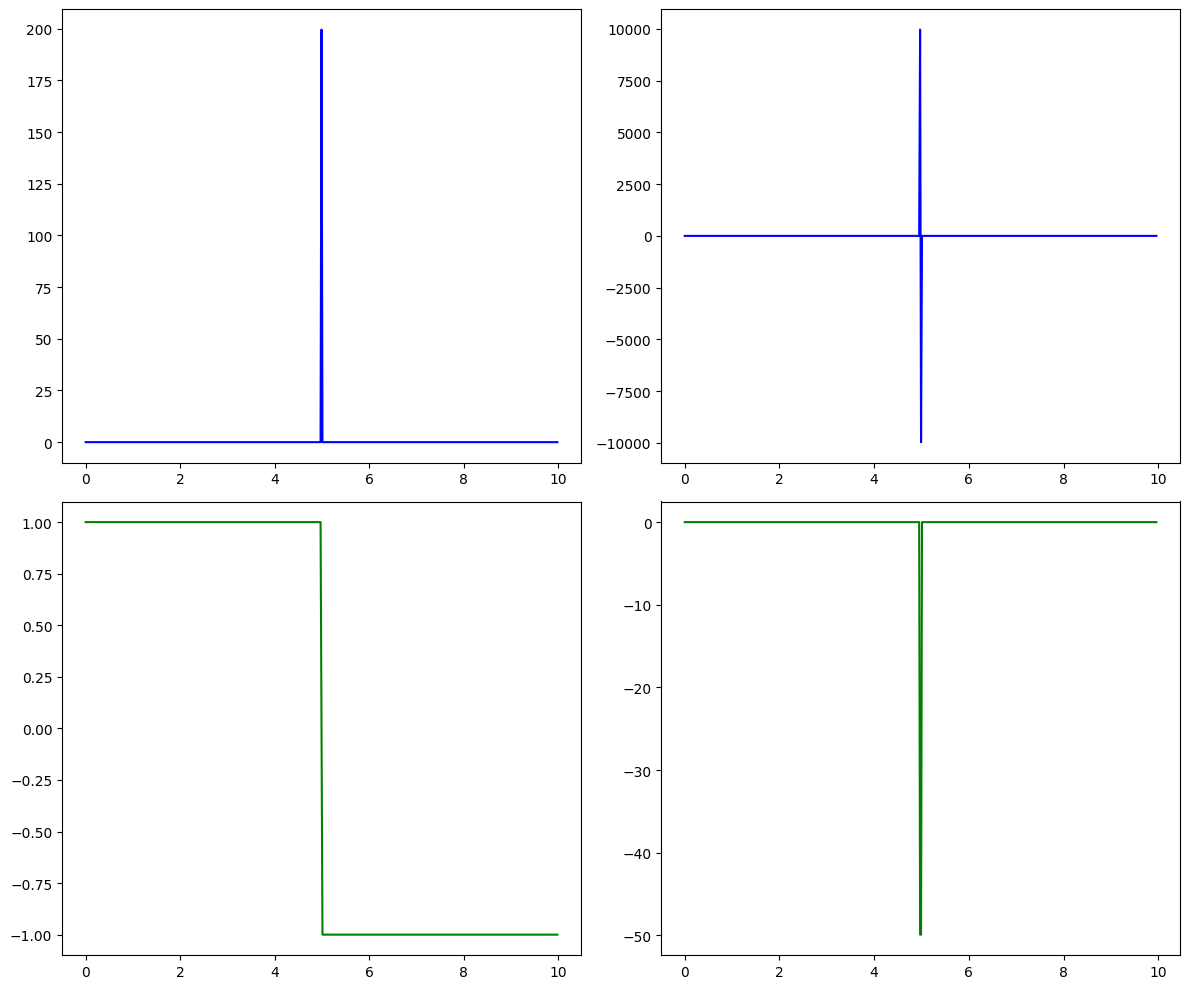

In [6]:
# To be completed
# Calculation of the first derivative of the 2 functions
first_derivative_amplitude_jump = np.diff(amplitude_jump) / np.diff(x)
first_derivative_roof = np.diff(roof) / np.diff(x)

# Calculation of the second derivative of the 2 functions
second_derivative_amplitude_jump = np.diff(first_derivative_amplitude_jump) / np.diff(x[:-1])
second_derivative_roof = np.diff(first_derivative_roof) / np.diff(x[:-1])

# Display of both first and second derivatives (curves)
x_first_derivative = x[:-1]
x_second_derivative = x[:-2]

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.plot(x_first_derivative, first_derivative_amplitude_jump, label="First Derivative (Amplitude Jump)", color="blue")

plt.subplot(2, 2, 2)
plt.plot(x_second_derivative, second_derivative_amplitude_jump, label="Second Derivative (Amplitude Jump)", color="blue")

plt.subplot(2, 2, 3)
plt.plot(x_first_derivative, first_derivative_roof, label="First Derivative (Roof)", color="green")

plt.subplot(2, 2, 4)
plt.plot(x_second_derivative, second_derivative_roof, label="Second Derivative (Roof)", color="green")

plt.tight_layout()
plt.show()

**_ANSWER :_**

What happens to the second derivative at the contour point (sudden change in intensity)?

**_ANSWER :_**

# 2. First-order derivative operators
Use a 256 grayscale palette to display your processing. Don't forget to pay attention to the type of variables when calculating derivatives. Data may be negative.

Calculate the gradient norm of the “cameraman.tif” image: to do this, calculate the directional derivatives (dx, dy) and the gradient norm.

In [ ]:
# To be completed
# Loading and displaying cameraman.tif
...

In [ ]:
# To be completed
# Function for calculating directional derivatives and gradient norms
...

Display and interpret the shape of each calculated derivative.

In [ ]:
# To be completed
# Display calculated derivatives
...

**_ANSWER :_**

Same questions with Sobel and Prewitt operators (feel free to use OpenCV's filter2D function).

In [ ]:
# To be completed
# Calculating the gradient norm via Sobel
...
# Gradient norm calculation via Prewitt
...

In [ ]:
# Display calculated derivatives (Sobel)
...

In [ ]:
# Display calculated derivatives (Prewitt)
...

**_ANSWER :_**

# 3. Second-order derivative operators
Apply the Laplacian operator to “cameraman.tif”.

In [ ]:
# To be completed
# Applying the Laplacian operator to cameraman.tif
...

We will use this formula to generate two masks of size 3x3 with sigma σ=0.6 and σ=0.9

\begin{equation*}
    h(x,y) = \frac{1}{2 \pi \sigma^{2}} exp(-\frac{(x^{2}+y^{2})}{2 \sigma^{2}})
\end{equation*}

The masks you will use are as follows:

\begin{equation*}
    h1 = \frac{1}{16} \begin{pmatrix} 1 & 1 & 1 \\ 1 & 8 & 1 \\ 1 & 1 & 1 \end{pmatrix}
\end{equation*}

\begin{equation*}
    h2 = \frac{1}{16} \begin{pmatrix} 1 & 2 & 1 \\ 2 & 4 & 2 \\ 1 & 2 & 1 \end{pmatrix}
\end{equation*}

Apply the difference of two Gaussian distributions operator (DOG)

In [ ]:
# To be completed
# DOG application on cameraman.tif
...

# 4 Extraction of contours by thresholding
Perform thresholding for first-order derivative operators

In [ ]:
# Thresholding function
...

In [ ]:
# To be completed
# Thresholding for 1st order operators
...

Perform thresholding for second-order derivative operators.

In [ ]:
# To be completed
# Thresholding for 2nd-order operators
...

What are the differences between these two families of contour detectors?

**_ANSWER :_**

# 5. Setting the scene

For the first time, we're going to go through almost an entire possible treatment process for an image. Here, as you'd expect, we're going to extract the contours from a noisy image. So we're going to separate our processing into 2 parts:
- Pre-processing (Filtering)
- Processing (Contour extraction)

To this we'll add the image noise, which we'll simulate ourselves, and the display of the result.

In [ ]:
# To be completed
# Creation of the EdgeExtractor function
...

**_Buzz:_** Choose a test image of your choice and noise it with salt-and-pepper noise thanks to TP3's implemented function (the Brain image would be a joy to process).

In [ ]:
# To be completed
# Data creation
...

**_Pre-processing:_** Apply whatever means you consider necessary to improve the quality of your image (a filter developed in TP3).

In [ ]:
# To be completed
# Pre-treatment
...

**_Processing:_** apply the method of your choice to detect image contours.

In [ ]:
# To be completed
# Treatment
...

**_Process result display_** From your initial image, create a result image in RGB and highlight the detected contours in Red.

In [ ]:
# A compléter
# Post-traitement
...

Any feedback on your entire process? (What worked, what could be improved, etc.).

**_ANSWER :_**